# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

In [1]:
# # (1 point) load train data, save class labels, plot first point as a digit
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two
# (3 points) plot results where the different digits are represented with different styles/colors
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (1 point) make a conclusion

url1 = 'http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py'
url2 = 'http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html'

print('Using materials from:\n[1] {}\n[2] {}'.format(url1, url2))

Using materials from:
[1] http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py
[2] http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html


In [2]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# digits = datasets.load_digits(return_X_y=True)
digits = datasets.load_digits(n_class=10)
# print(type(digits))
X = digits.data
y = digits.target
# X = digits[0][1:] # leave one digit for out-of-sample
# y = digits[1][1:]
n_samples, n_features = X.shape
n_neighbors = 30

# print(dir(digits))
# bla = digits.data[0]
# print(len(bla))

In [3]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [4]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

In [5]:
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

Computing Isomap embedding
Done.


In [6]:
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing LLE embedding
Done. Reconstruction error: 5.16178e-07


In [7]:
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Spectral embedding


In [8]:
# Local Tangent Space Alignment
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

Computing LTSA embedding
Done. Reconstruction error: 0.343084


In [9]:
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing MDS embedding
Done. Stress: 449418232.009194


In [10]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


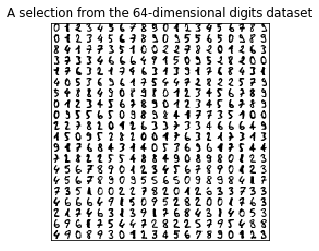

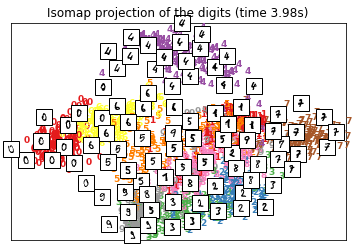

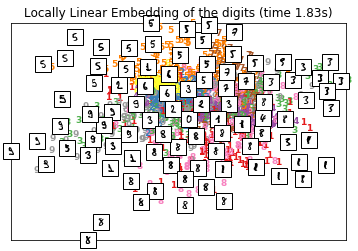

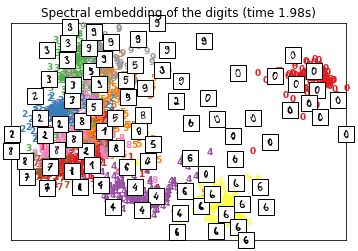

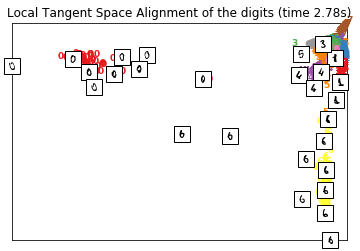

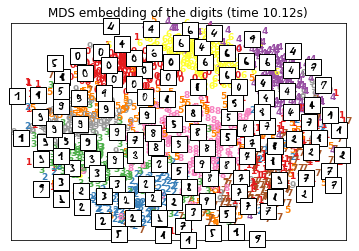

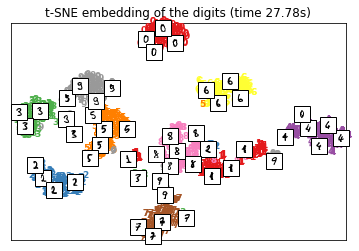

In [11]:
# (3 points) plot results where the different digits are represented with different styles/colors
plt.show()

In [14]:
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# Не успел

(1 point) make a conclusion

Isomap (время работы ~4 с) более-менее разбил на классы, хотя и есть некоторые артефакты 

LLE (время работы ~2 с) снизил размерность так, что классы стали накладываться друг на друга

Spectral embedding (время работы ~2 с) снизил размерность так, что при этом особенно в стороне остались нули и шестерки, а все остальные оказались очень скучкованны

У LTSA (время работы ~3 с) характеристика для предыдущего метода еще более выражена (скучкованность и отделение нулей и шестерок)

MDS (время работы ~10 с) понизил размерность не самым лучшим образом, например, классы с пятерками отделены друг от друга, но в целом классы разделены неплохо

t-SNE (время работы ~30 с) разбил лучше, но некоторые цифры (особенно 9) часто находятся не в своих классах

Если сравнивать методы по времени/качеству, то выигрывает LTSA, при этом t-SNE по качеству разделения обходит остальных, но время работы превосходит конкурентов в разы.